Imports of necessary functions

In [46]:
%matplotlib inline

import numpy             as np
import matplotlib.pyplot as plt

from invisible_cities.core    .system_of_units_c import        units
from invisible_cities.io      .pmaps_io          import   load_pmaps
from invisible_cities.core    .random_sampling   import NoiseSampler
from invisible_cities.reco    .pmaps_functions   import  RebinMethod
from invisible_cities.reco    .pmaps_functions   import   rebin_peak
from invisible_cities.database                   import      load_db as DB

plt.rcParams["figure.figsize"] = 20, 50

pmaps = load_pmaps('../IC/testNotebooks/pmaps_0000_6238_trg2_v0.9.9_20180727_krth1300.h5')

In [29]:
## Get the noise sampler
ns = NoiseSampler('new', 6238)

## Get sensor_positions
sens_x = DB.DataSiPM('new', 6238).X.values
sens_y = DB.DataSiPM('new', 6238).Y.values

## Rebin in a couple of ways to see differing effects of signal to noise
rebin_stand  = rebin_peak(pmaps[1].s2s[0], 2)
rebin_thresh = rebin_peak(pmaps[1].s2s[0], 6000, RebinMethod.threshold)

In [30]:
bins_stand  = rebin_stand .bin_widths
bins_thresh = rebin_thresh.bin_widths
print(bins_stand, bins_thresh)

[2000. 2000. 2000. 2000. 2000. 2000. 2000. 1000.] [4000. 1000. 1000. 1000. 1000. 1000. 1000. 5000.]


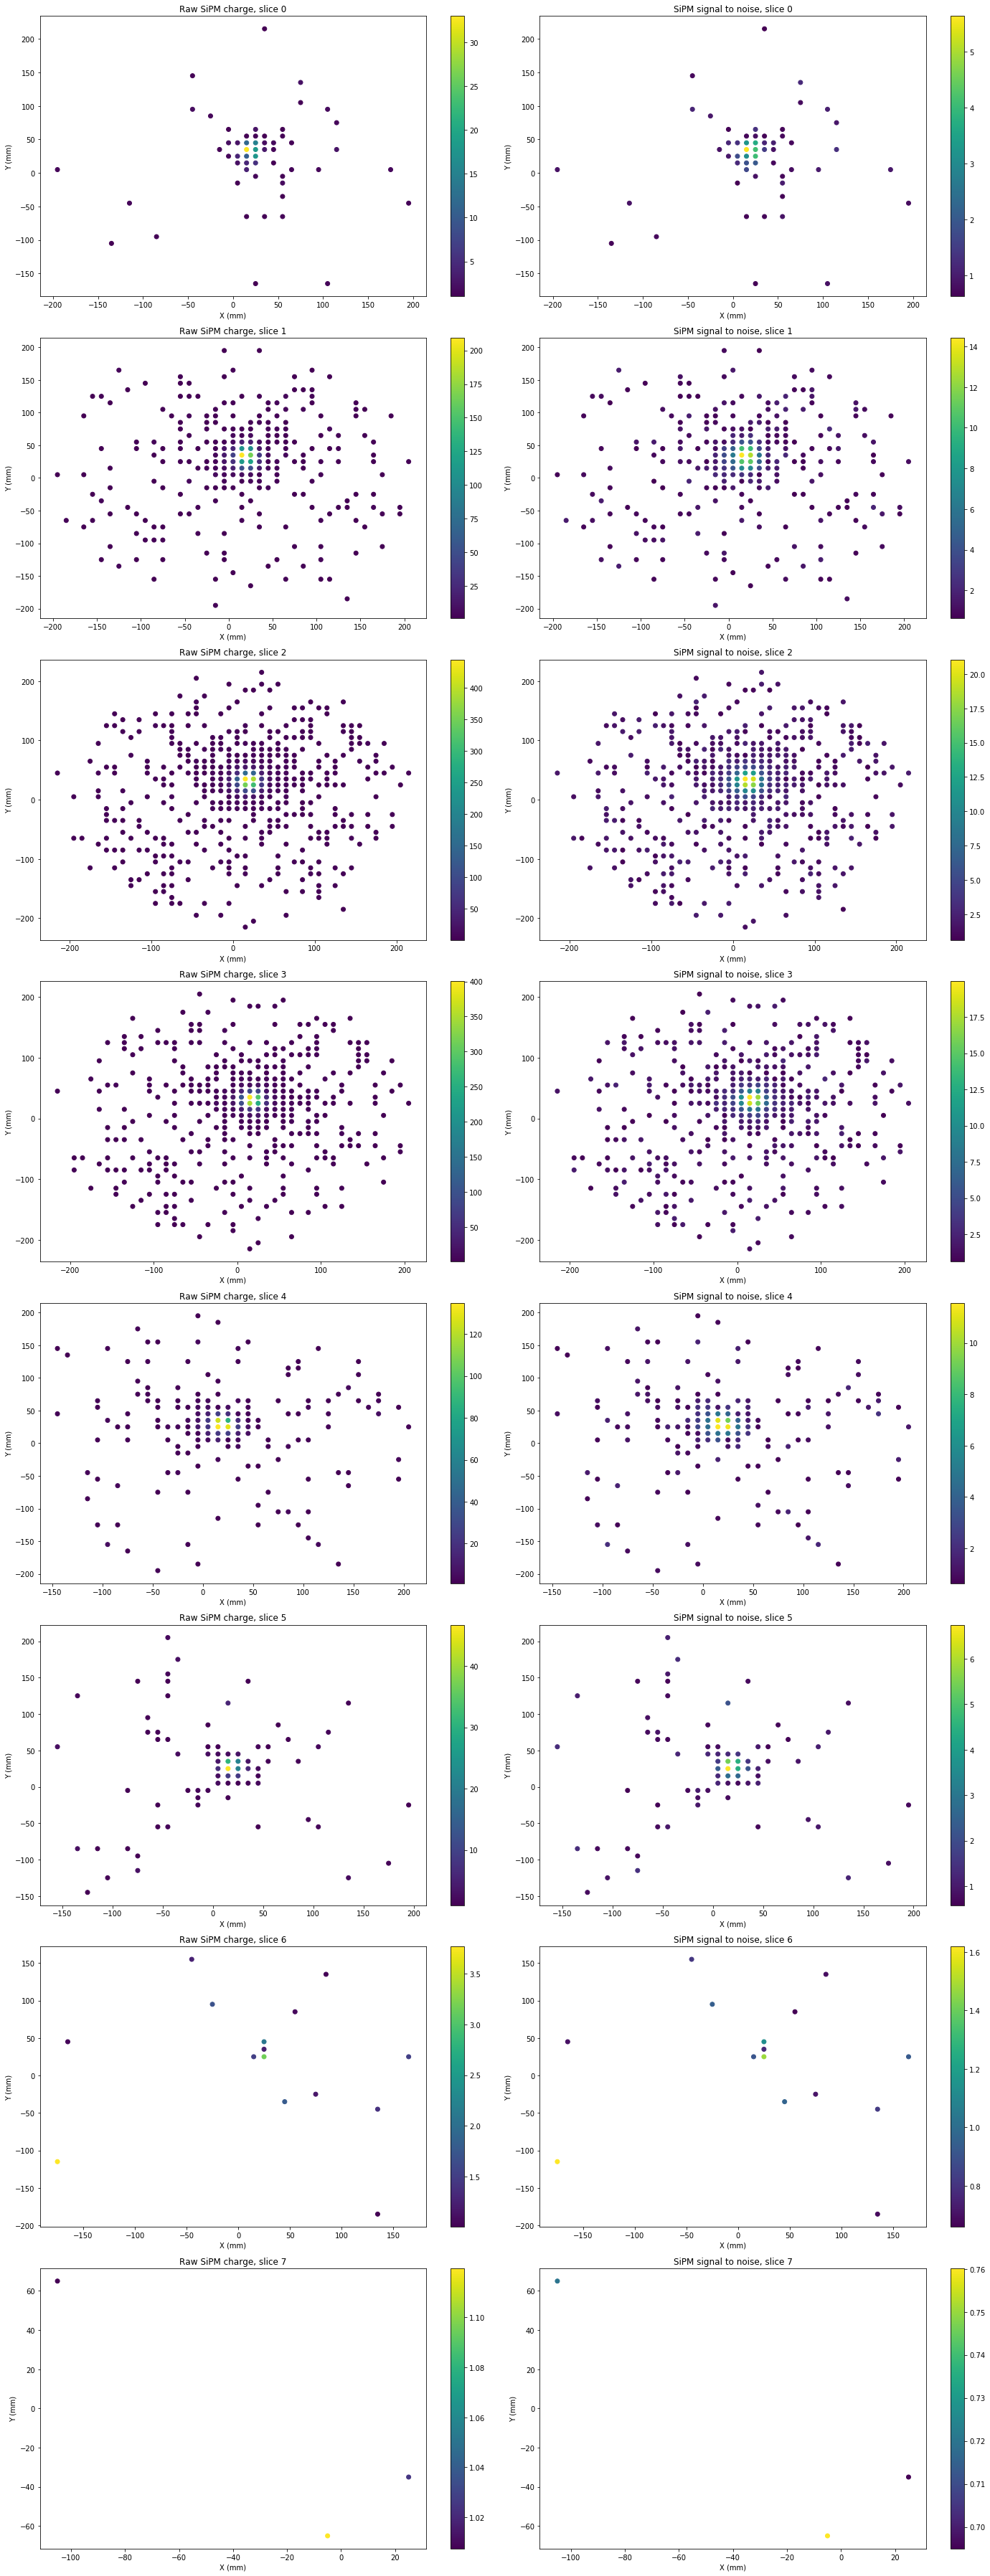

In [47]:
## compare raw charge and S/N for standard
ids = rebin_stand.sipms.ids
n_slice = len(bins_stand)
n_col   = 2
for slice_no, slice_wid in enumerate(bins_stand):
    slice_charge = rebin_stand.sipms.time_slice(slice_no)
    ## Ceil int to protect agains non-integer multiples of mus for bin_widths in current selection
    sample_wid      = np.ceil(int(slice_wid) / units.mus).astype('int')
    signal_to_noise = ns.signal_to_noise(ids, slice_charge, sample_wid)
    plt_no = n_col * slice_no + 1
    ## Raw charge
    plt.subplot(n_slice, n_col, plt_no)
    non_zero = slice_charge != 0
    plt.scatter(sens_x[ids][non_zero], sens_y[ids][non_zero], c=slice_charge[non_zero])
    plt.colorbar()
    plt.title('Raw SiPM charge, slice '+str(slice_no))
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    
    ## Signal to noise
    plt.subplot(n_slice, n_col, plt_no + 1)
    non_zero = signal_to_noise != 0
    plt.scatter(sens_x[ids][non_zero], sens_y[ids][non_zero], c=signal_to_noise[non_zero])
    plt.colorbar()
    plt.title('SiPM signal to noise, slice '+str(slice_no))
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
plt.tight_layout()

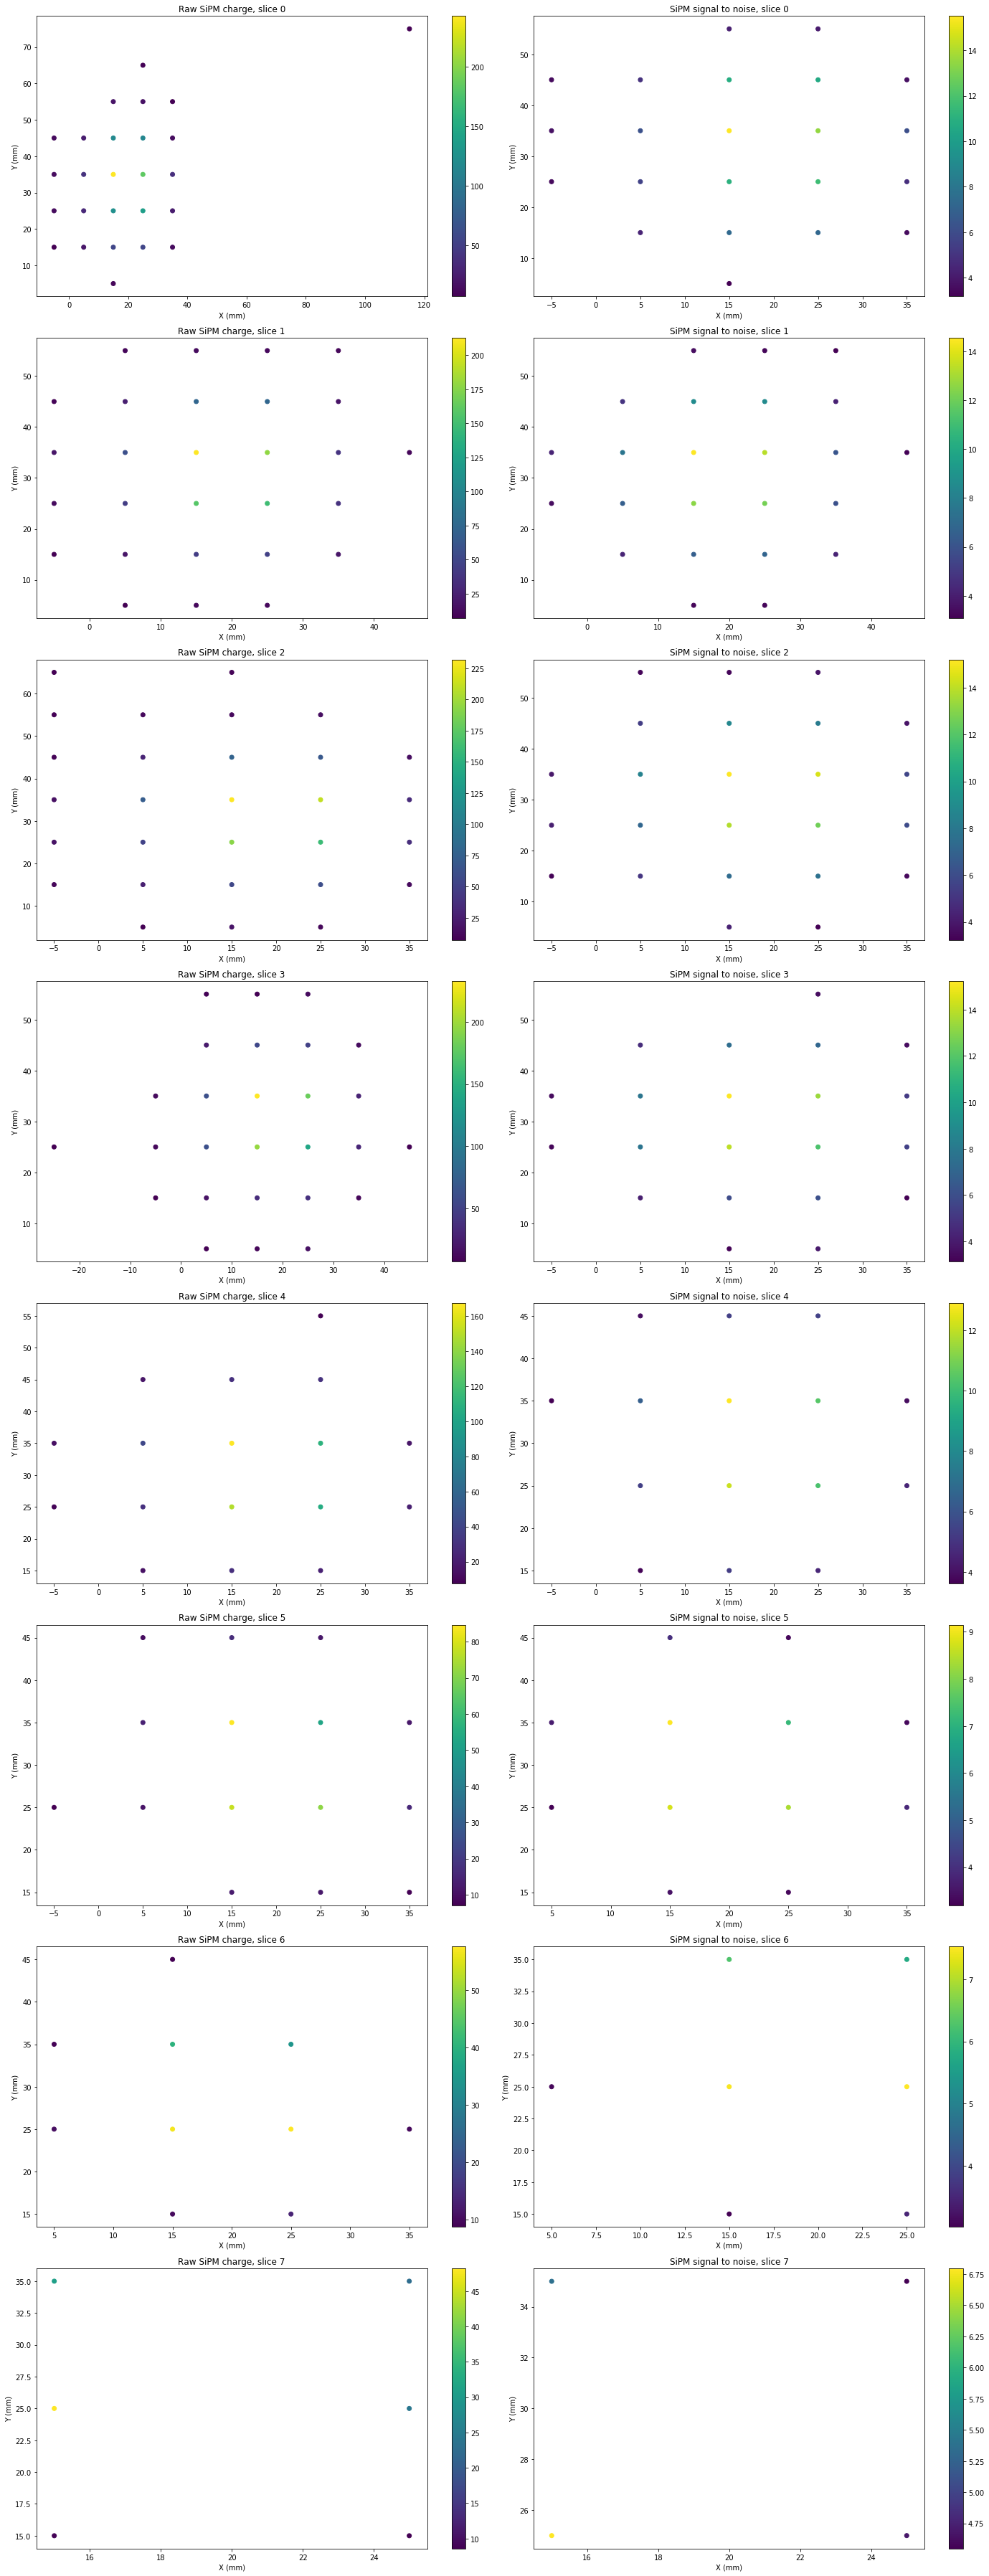

In [51]:
## compare raw charge and S/N for threshold rebin
ids = rebin_thresh.sipms.ids
n_slice = len(bins_thresh)
n_col   = 2
for slice_no, slice_wid in enumerate(bins_thresh):
    slice_charge = rebin_thresh.sipms.time_slice(slice_no)
    ## Ceil int to protect agains non-integer multiples of mus for bin_widths in current selection
    sample_wid      = np.ceil(int(slice_wid) / units.mus).astype('int')
    signal_to_noise = ns.signal_to_noise(ids, slice_charge, sample_wid)
    plt_no = n_col * slice_no + 1
    ## Raw charge
    plt.subplot(n_slice, n_col, plt_no)
    non_zero = slice_charge !0 
    plt.scatter(sens_x[ids][non_zero], sens_y[ids][non_zero], c=slice_charge[non_zero])
    plt.colorbar()
    plt.title('Raw SiPM charge, slice '+str(slice_no))
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    
    ## Signal to noise
    plt.subplot(n_slice, n_col, plt_no + 1)
    non_zero = signal_to_noise >= 3
    plt.scatter(sens_x[ids][non_zero], sens_y[ids][non_zero], c=signal_to_noise[non_zero])
    plt.colorbar()
    plt.title('SiPM signal to noise, slice '+str(slice_no))
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
plt.tight_layout()